In [1]:
import numpy as np
import matplotlib.pyplot as plt
import noise
import perlin
%matplotlib inline

### linear interpolation
We need a function ${f}$ that, given values ${v_0}$ and ${v_1}$ and some interval ${t}$ where $0 \le {t} \le 1$, returns an *interpolated* value between ${v_0}$ and ${v_1}$.

The best way to start is with [linear interpolation](https://en.wikipedia.org/wiki/Linear_interpolation) and that's what the `lerp` function does.

Let's assume we have to values ${v_0}$ and ${v_1}$:

In [2]:
v0 = 2
v1 = 5

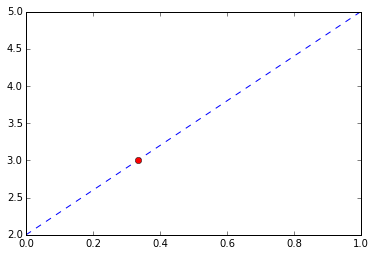

In [3]:
plt.plot([0, 1], [2, 5], '--')
t = 1.0 / 3
vt = noise.lerp(2, 5, t)
plt.plot(t, vt, 'ro')

### smoothstep

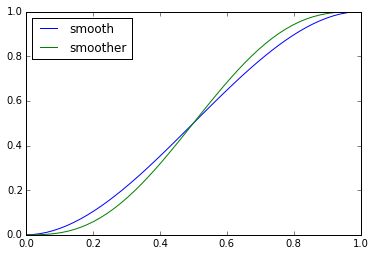

In [4]:
x = np.linspace(0, 1.0)
y1 = noise.ss3(x)
y2 = noise.ss5(x)
plt.plot(x, y1, label="smooth")
plt.plot(x, y2, label="smoother")
plt.legend(loc=2)

### vectors

In [5]:
class Vector:
    def __init__(self, *components):
        self.components = np.array(components)
        
    def mag(self):
        return np.sqrt(sum(self.components**2))
        
    def __len__(self):
        return len(self.components)
    
    def __iter__(self):
        for c in self.components:
            yield c

### seeding

In [6]:
np.random.ranf((2,3,2,2)) # seed in n-dimensions

array([[[[ 0.75728211,  0.92809156],
         [ 0.52596573,  0.95991111]],

        [[ 0.27077315,  0.35857833],
         [ 0.78857169,  0.0811108 ]],

        [[ 0.96781559,  0.29369675],
         [ 0.26753057,  0.17191009]]],


       [[[ 0.3683529 ,  0.34009969],
         [ 0.27540737,  0.12859288]],

        [[ 0.33622258,  0.50368935],
         [ 0.41836758,  0.19273635]],

        [[ 0.71072524,  0.45796757],
         [ 0.32209473,  0.8456265 ]]]])

### noise field

For instance, to create a hypercube of noise we could do something like this:

In [7]:
c4 = noise.Field(d=(8,8,8,8), seed = 5)

We can plot any course through this field, for example:

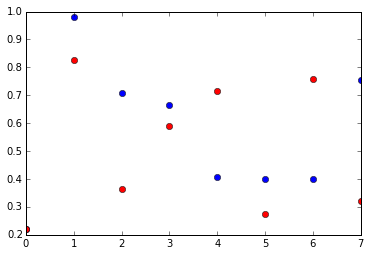

In [8]:
q = np.arange(0, 8)
x = [c4(x, 0, 0, 0) for x in q]
y = [c4(0, y, 0, 0) for y in q]
plt.plot(q, x, 'bo')
plt.plot(q, y, 'ro')

We *could* render a graph but that would be like cheating. We would be using the `matplotlib` linear interpolation instead of our own:

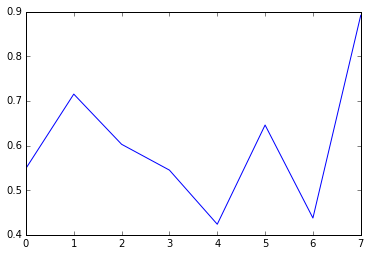

In [9]:
# a one-dimensional noise field of 8 samples
c1 = noise.Field(d=(8,))
x = np.linspace(0, 7, 8)
y = [c1(x) for x in x]
# this will use matplotlib interpolation and not ours
plt.plot(x, y)

We can do better though by using one of the [smoothstep](https://en.wikipedia.org/wiki/Smoothstep) functions. Instead of calculating ${v_t}$ directly we can do some tricks on ${t}$ to modify the outcome.

For convience let's start with the `ss3` function and plot it so we know what it looks like:

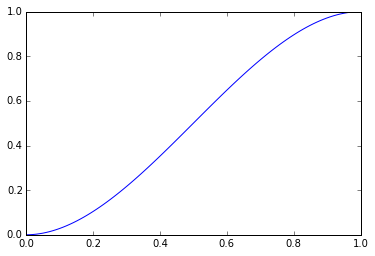

In [10]:
x = np.linspace(0, 1.0, 100)
y = noise.ss3(x)
plt.plot(x, y)

Now we setup a noise field and define a helper function `noise1` in order to get our coherent noise. 

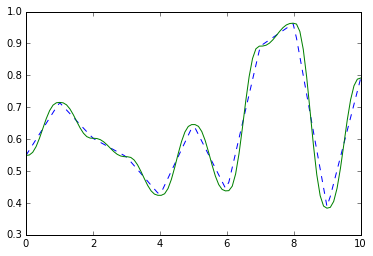

In [11]:
samples = 32
gen = noise.Field(d=(samples,))

def noise1(x, curve = lambda x: x):
    xi = int(x)
    xmin = xi % samples
    xmax = 0 if xmin == (samples - 1) else xmin + 1
    t = x - xi
    return noise.lerp(gen(xmin), gen(xmax), curve(t))

x = np.linspace(0, 10, 100)
y1 = [noise1(x) for x in x]
y2 = [noise1(x, noise.ss5) for x in x]
plt.plot(x, y1, '--')
plt.plot(x, y2)

### perlin noise

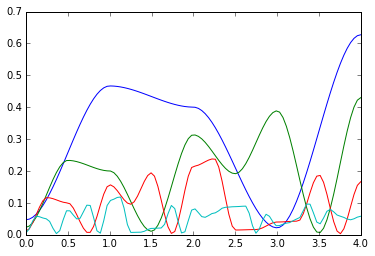

In [12]:
x = np.linspace(0, 4, 100)
y1 = [perlin.noise2d(x, 0) for x in x]
y2 = [0.5 * perlin.noise2d(x * 2, 0) for x in x]
y3 = [0.25 * perlin.noise2d(x * 4, 0) for x in x]
y4 = [0.125 * perlin.noise2d(x * 8, 0) for x in x]
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)

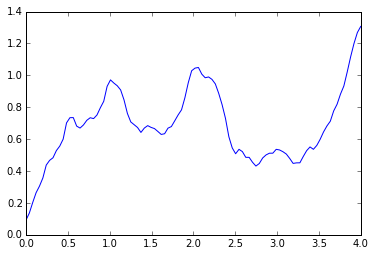

In [14]:
x = np.linspace(0, 4, 100)
y = [perlin.fbm(x, 0) for x in x]
plt.plot(x, y)